<a href="https://colab.research.google.com/github/newlearner2020-code/Machine_learning/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns


In [57]:
df=pd.read_csv("/content/train.csv")

In [58]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
df.drop(["Loan_ID"],axis=1,inplace=True)

checking the data if contain any null or duplicate value


In [61]:
val=df.isnull().sum()
print(val)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


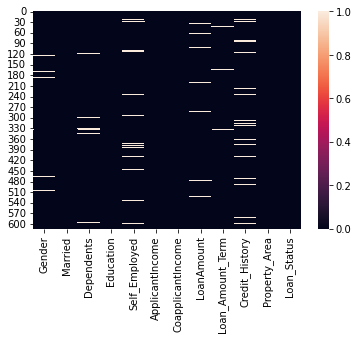

In [62]:
sns.heatmap(df.isnull())

with the help of heatmap we can see the values with white line representing the null values.






++++++++++++++++++++++++++++++++++++++++++++

some of columns are containing the categorical data so we applying the imputation method over them so first we plot agraph to show the count of the category. we will apply same method over all categorical column.


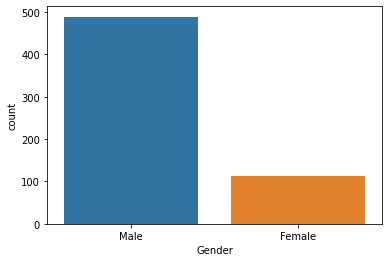

In [63]:
sns.countplot(x=df["Gender"],data=df)

in null values for the categorical couluns i  use the values according to mejority here the count of males greater then the females fo remain values get updated on the basis of it.
-------------------------------------
I follow the same method to fill all the null values of categorical coloumns
-----------------------

In [64]:
df["Gender"].fillna("Male",inplace=True)

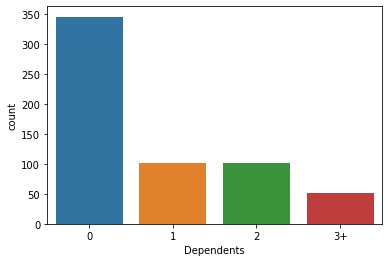

In [66]:
sns.countplot(x=df["Dependents"],data=df)

In [67]:
df["Dependents"].fillna(0,inplace=True)

In [68]:
df["Dependents"].isnull().sum()

0

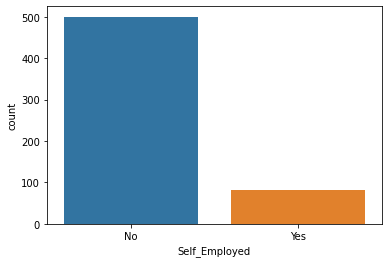

In [69]:

sns.countplot(x=df["Self_Employed"],data=df)

In [70]:
df["Self_Employed"].fillna(0,inplace=True)

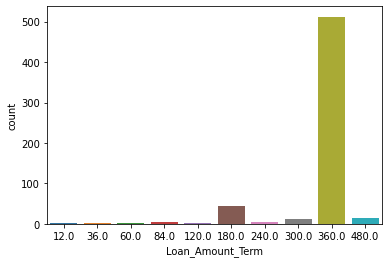

In [71]:
sns.countplot(x=df["Loan_Amount_Term"],data=df)

In [72]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [73]:
df["Loan_Amount_Term"].fillna(360,inplace=True)

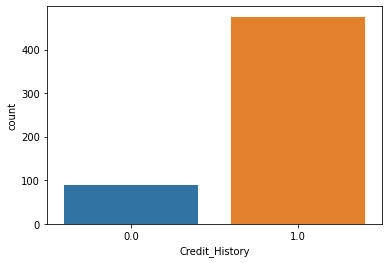

In [74]:
sns.countplot(x=df["Credit_History"],data=df)

In [75]:
df["Credit_History"].fillna(1,inplace=True)

In [76]:

df["Married"].fillna("Yes",inplace=True)

In [77]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

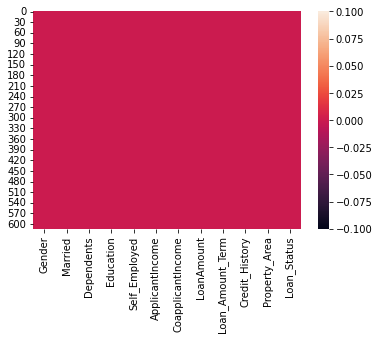

In [78]:
#heatmap to check null values.
sns.heatmap(df.isnull())

the above heatmap showing there is no null value remain
-----------------------

In [79]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [81]:
#we remove all null values.
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

handle the categorical  data Encoding them using simple replace() fuction  
------------------

In [82]:

df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [83]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [84]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [85]:
df.replace({'Dependents':{'0':0, '1':1, '2':2, '3+':3, 0:4}},inplace=True)

In [86]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64

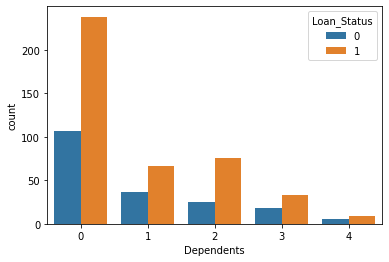

In [87]:
sns.countplot(x=df["Dependents"],data=df,hue="Loan_Status")

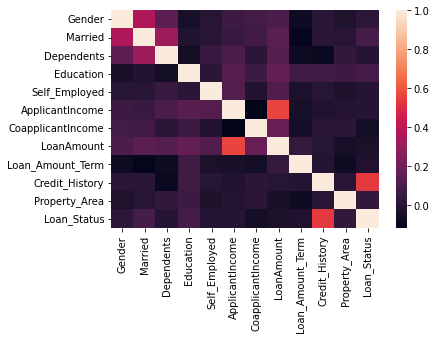

In [88]:
sns.heatmap(df.corr())

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


Exploratory Data Analysis
-----------------------------------

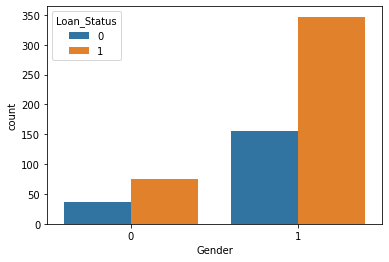

In [90]:
sns.countplot(x=df["Gender"],data=df,hue="Loan_Status")

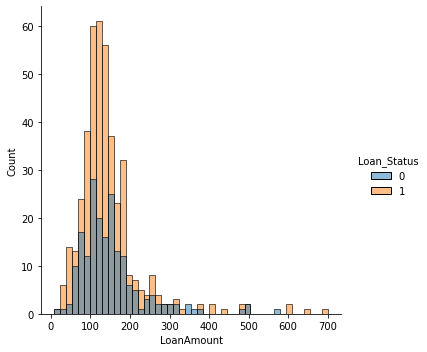

In [91]:
sns.displot(hue='Loan_Status',x='LoanAmount',data=df)

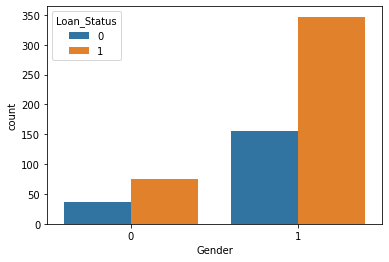

In [92]:
sns.countplot(data=df, x="Gender", hue="Loan_Status")

gender:- (0,female)(1,male)

loan_status:- (0,no)(1,yes)

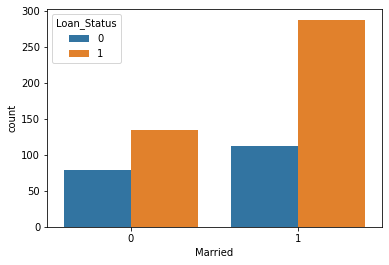

In [93]:
sns.countplot(data=df, x="Married", hue="Loan_Status")

loan_status:- (0,no)(1,yes)

married :-(0,no)(1,yes)


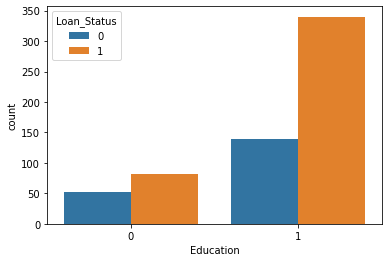

In [94]:
sns.countplot(data=df, x="Education", hue="Loan_Status")

'Education':'Graduate':1,'Not Graduate':0

loan_status:- (0,no)(1,yes)

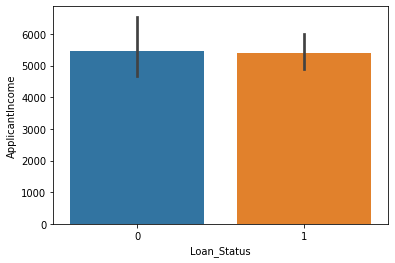

In [95]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df)

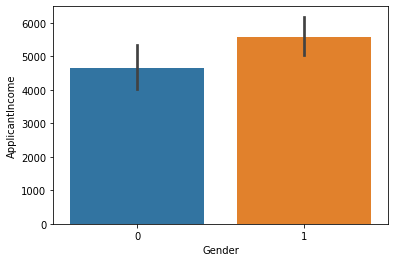

In [96]:
sns.barplot(y="ApplicantIncome",x="Gender",data=df)

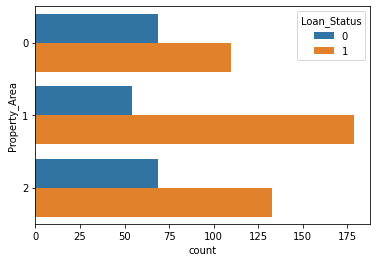

In [97]:
sns.countplot(y="Property_Area",hue="Loan_Status",data=df)

from above we can analyise semiurbans getting more loands as compare to the rural and urbans.

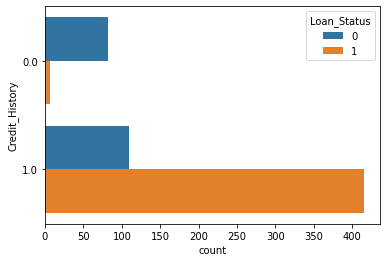

In [98]:
sns.countplot(y="Credit_History",hue="Loan_Status",data=df)

model _train
-----------------

In [99]:
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.26,random_state=50)

In [101]:
x_train.shape

(454, 11)

In [102]:
x_test.shape

(160, 11)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
log=LogisticRegression(random_state=0).fit(x_train,y_train)
sv=svm.SVC(kernel='linear').fit(x_train,y_train)
treee = tree.DecisionTreeClassifier().fit(x_train,y_train)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
log_pre=log.predict(x_test)
tree_pre=treee.predict(x_test)
sv_pre=sv.predict(x_test)
gcp_pre=gpc.predict(x_test)

In [105]:
print(log_pre)
print("\n\n")
print(tree_pre)
print("\n\n")
print(sv_pre)
print("\n\n")
print(gcp_pre)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1]



[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1]



[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 0 1]



[1 0 0 0 0 0 

In [112]:
from sklearn.metrics import accuracy_score


In [113]:
d=accuracy_score(y_test,log_pre)

In [114]:
c=accuracy_score(y_test,tree_pre)

In [115]:
b=accuracy_score(y_test,sv_pre)

In [116]:
a=accuracy_score(y_test,gcp_pre)

In [117]:

data = [['logistic Regression',d], ['svm', c], ['gaussian process',a],['tree',b]]
df1 = pd.DataFrame(data, columns=['Model', 'acccuracy'])

In [118]:
df1.head()

,Model,acccuracy
0,logistic Regression,0.78125
1,svm,0.76875
2,gaussian process,0.44375
3,tree,0.75625
